In [1]:
import pandas as pd
data = pd.read_csv("../content/heart_small.csv")

In [2]:
from sklearn.model_selection import train_test_split
X = data.drop('heart disease', axis=1)
y = data['heart disease']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y,random_state=1)

# Ensembles - Gradient boosting
Boosting is an ensemble technique that combines multiple weak learners, typically decision trees, to create a robust and powerful predictive model. It does so in an iterative fashion, where each new stage (tree) corrects the errors of the previous ones.

**Gradient Tree Boosting** or **Gradient Boosted Decision Trees (GBDT)** is a generalization of boosting to arbitrary differentiable loss functions. GBDT is an excellent model for both regression and classification.


## GradientBoostingClassifier

In [3]:
from sklearn.ensemble import GradientBoostingClassifier

In [4]:
gbc=GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [5]:
gbc.score(X_test, y_test)

0.5555555555555556

In [6]:
y_pred = gbc.predict(X_test)

In [7]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred )

array([[26, 19],
       [17, 19]])

In [8]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:",accuracy)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.5555555555555556

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.58      0.59        45
           1       0.50      0.53      0.51        36

    accuracy                           0.56        81
   macro avg       0.55      0.55      0.55        81
weighted avg       0.56      0.56      0.56        81



In [9]:
gbc.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [10]:
gbc=GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [11]:
gbc=GradientBoostingClassifier(random_state=42,n_estimators=10,verbose=2)
gbc.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3091            0.02s
         2           1.2572            0.02s
         3           1.2103            0.02s
         4           1.1729            0.01s
         5           1.1381            0.01s
         6           1.1100            0.01s
         7           1.0808            0.00s
         8           1.0583            0.00s
         9           1.0346            0.00s
        10           1.0124            0.00s


GradientBoostingClassifier(n_estimators=10, random_state=42, verbose=2)

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
params = {
    'max_depth': [1,2,3,5],
    'learning_rate': [0.001, 0.1, 1],
    'n_estimators': [10,50,100,200]
}

In [14]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=gbc,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=3, scoring="accuracy")


grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


      Iter       Train Loss   Remaining Time 
         1           1.3734            0.03s
         2           1.3731            0.02s
         3           1.3729            0.01s
         4           1.3727            0.01s
         5           1.3724            0.01s
         6           1.3722            0.01s
         7           1.3720            0.00s
         8           1.3717            0.00s
         9           1.3715            0.00s
        10           1.3713            0.00s
[CV 1/5] END learning_rate=0.001, max_depth=1, n_estimators=10;, score=0.553 total time=   0.0s
      Iter       Train Loss   Remaining Time 
         1           1.3734            0.08s
         2           1.3732            0.08s
         3           1.3730            0.07s
         4           1.3727            0.07s
         5           1.3725            0.07s
         6           1.3723            0.07s
         7           1.3721            0.07s
         8           1.3719            0.07s
  

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(n_estimators=10,
                                                  random_state=42, verbose=2),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1],
                         'max_depth': [1, 2, 3, 5],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy', verbose=3)

In [15]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 50}

In [16]:
gbc_02=GradientBoostingClassifier(n_estimators=50, learning_rate=0.05, max_depth=1, random_state=42)
gbc_02.fit(X_train, y_train)
gbc_02.score(X_test,y_test)

0.6296296296296297

/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


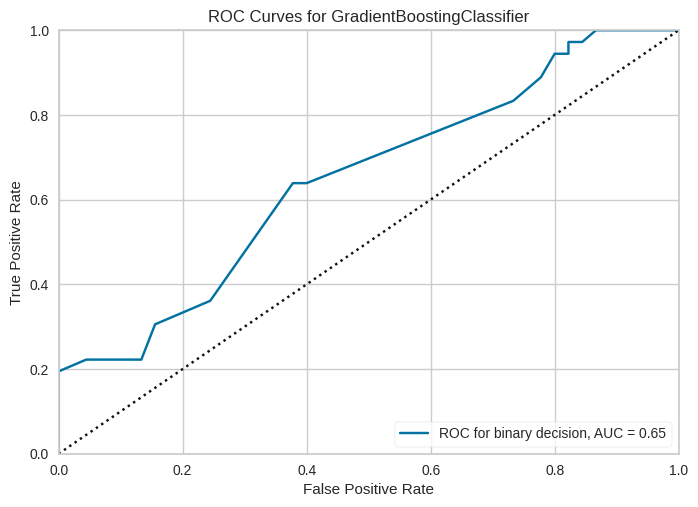

<Axes: title={'center': 'ROC Curves for GradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [17]:
from yellowbrick.classifier import ROCAUC
vis = ROCAUC(gbc_02, binary=True)

vis.fit(X_train, y_train)        # Fit the training data to the visualizer
vis.score(X_test, y_test)        # Evaluate the model on the test data
vis.show()

In [18]:
from sklearn.model_selection import validation_curve
import numpy as np
import matplotlib.pyplot as plt

In [19]:
param_range= [0.05, 0.1, 0.25, 0.5, 0.75, 1]
train_scores, test_scores = validation_curve(
                estimator=gbc_02,
                X=X_train,
                y=y_train,
                param_name='learning_rate',
                param_range=param_range,
                cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

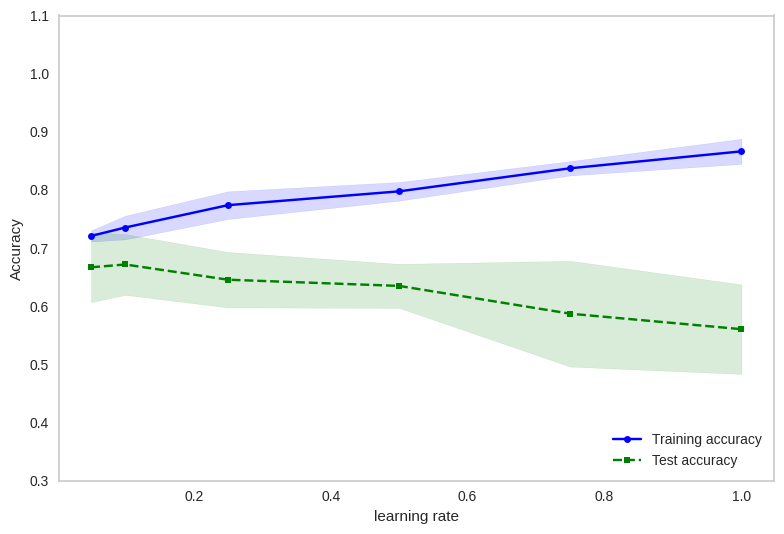

In [20]:
plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Test accuracy')

plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
#plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('learning rate')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1.1])
plt.tight_layout()
plt.show()

In [21]:
param_range= [0.05, 0.1, 0.25, 0.5, 0.75, 1]
train_scores, test_scores = validation_curve(
                estimator=gbc_02,
                X=X_train,
                y=y_train,
                param_name='learning_rate',
                param_range=param_range,
                cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [22]:
# Instantiate the grid search model  - ROC and AUC
grid_search2 = GridSearchCV(estimator=gbc,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=3, scoring="accuracy")


grid_search2.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
      Iter       Train Loss   Remaining Time 
      Iter       Train Loss   Remaining Time 
      Iter       Train Loss   Remaining Time 
         1           1.3734            0.02s
         1           1.3733            0.01s
         1           1.3733            0.02s
         2           1.3730            0.01s
         2           1.3729            0.01s
         2           1.3731            0.02s
         3           1.3727            0.01s
         3           1.3726            0.01s
         3           1.3729            0.02s         4           1.3725            0.01s

         4           1.3723            0.01s
         5           1.3722            0.01s
         4           1.3727            0.01s
         5           1.3720            0.01s
         6           1.3719            0.01s
         5           1.3724            0.01s
         6           1.3716            0.01s
         7           1.3716        

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(n_estimators=10,
                                                  random_state=42, verbose=2),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1],
                         'max_depth': [1, 2, 3, 5],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy', verbose=3)

In [23]:
grid_search2.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 50}

In [24]:
grid_search2.score(X_test,y_test)

0.6296296296296297

/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


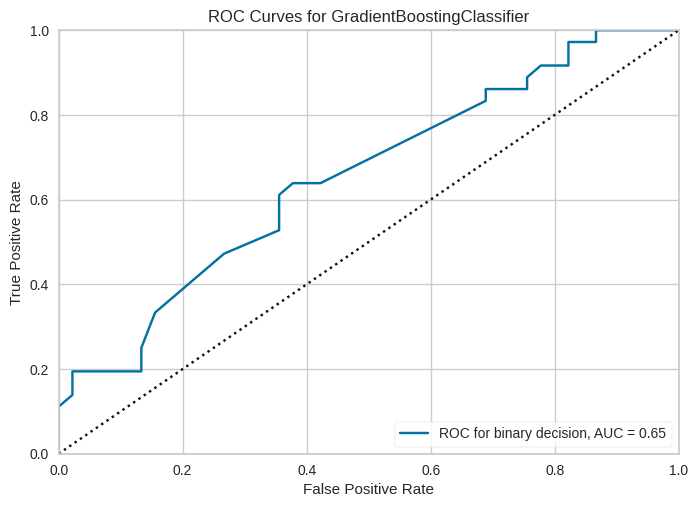

<Axes: title={'center': 'ROC Curves for GradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [25]:
from yellowbrick.classifier import ROCAUC
vis = ROCAUC(grid_search2.best_estimator_, binary=True)

vis.fit(X_train, y_train)        # Fit the training data to the visualizer
vis.score(X_test, y_test)        # Evaluate the model on the test data
vis.show()

# Histogram-Based Gradient Boosting

In [26]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [27]:
hbc=HistGradientBoostingClassifier(random_state=42)
hbc.fit(X_train, y_train)
hbc.score(X_test, y_test)

0.5555555555555556

In [28]:
params3 = {
    'max_depth': [1,2,3,5],
    'learning_rate': [0.001, 0.1, 1],
    'max_iter': [10,50,100,200, 300, 500]
}

In [29]:

grid_search3 = GridSearchCV(estimator=hbc,
                           param_grid=params3,
                           cv = 5,
                           n_jobs=-1, verbose=3, scoring="roc_auc")


grid_search3.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 2/5] END learning_rate=0.001, max_depth=1, max_iter=10;, score=0.668 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=1, max_iter=10;, score=0.727 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=1, max_iter=10;, score=0.756 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=1, max_iter=50;, score=0.727 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=1, max_iter=10;, score=0.602 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=1, max_iter=50;, score=0.668 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=1, max_iter=10;, score=0.637 total time=   0.1s
[CV 4/5] END learning_rate=0.001, max_depth=1, max_iter=50;, score=0.756 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=1, max_iter=50;, score=0.602 total time=   0.1s
[CV 2/5] END learning_rate=0.001, max_depth=1, max_iter=100;, score=0.668 total time=   0.0s
[CV 5/5] END lear

GridSearchCV(cv=5, estimator=HistGradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1],
                         'max_depth': [1, 2, 3, 5],
                         'max_iter': [10, 50, 100, 200, 300, 500]},
             scoring='roc_auc', verbose=3)

In [30]:
grid_search3.best_params_

{'learning_rate': 0.001, 'max_depth': 2, 'max_iter': 200}

In [31]:
hbc_02=HistGradientBoostingClassifier(learning_rate=0.001, max_depth=2, max_iter=200, random_state=42)
hbc_02.fit(X_train, y_train)
hbc_02.score(X_test, y_test)

0.5679012345679012

/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(


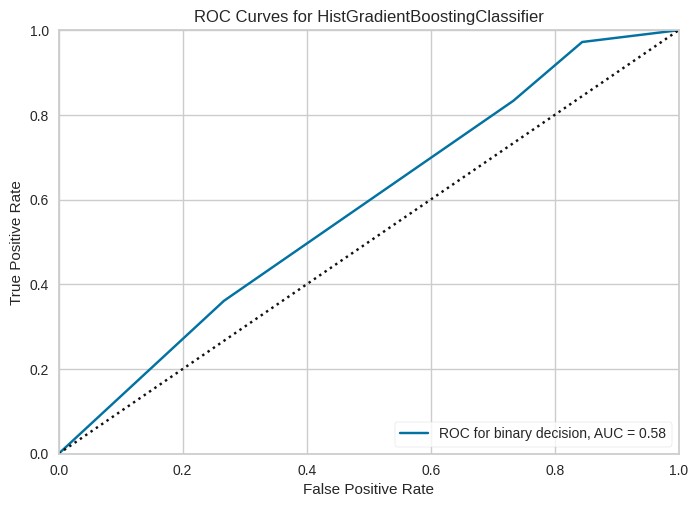

<Axes: title={'center': 'ROC Curves for HistGradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [32]:
from yellowbrick.classifier import ROCAUC
vis = ROCAUC(hbc_02, binary=True)

vis.fit(X_train, y_train)        # Fit the training data to the visualizer
vis.score(X_test, y_test)        # Evaluate the model on the test data
vis.show()

In [33]:
param4 = {
    'learning_rate': [0.01, 0.1],
    'max_iter': [100, 200],
    'max_depth': [3, 5, 10],
    'l2_regularization': [0.0, 0.01]
}

In [34]:
grid_search4 = GridSearchCV(estimator=hbc,
                           param_grid=param4,
                           cv = 5,
                           n_jobs=-1, verbose=3, scoring="acuracy")


grid_search4.fit(X_train, y_train)

InvalidParameterError: The 'scoring' parameter of GridSearchCV must be a str among {'homogeneity_score', 'neg_mean_gamma_deviance', 'r2', 'explained_variance', 'precision_weighted', 'neg_root_mean_squared_log_error', 'adjusted_rand_score', 'roc_auc_ovr_weighted', 'neg_mean_squared_error', 'neg_max_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'roc_auc_ovo', 'f1_macro', 'roc_auc_ovr', 'top_k_accuracy', 'positive_likelihood_ratio', 'f1_micro', 'normalized_mutual_info_score', 'd2_absolute_error_score', 'neg_mean_poisson_deviance', 'precision', 'precision_macro', 'recall', 'recall_macro', 'accuracy', 'jaccard_macro', 'precision_samples', 'recall_samples', 'recall_weighted', 'mutual_info_score', 'neg_median_absolute_error', 'jaccard', 'rand_score', 'recall_micro', 'neg_log_loss', 'f1', 'neg_mean_absolute_error', 'roc_auc', 'balanced_accuracy', 'jaccard_micro', 'matthews_corrcoef', 'neg_mean_absolute_percentage_error', 'completeness_score', 'fowlkes_mallows_score', 'average_precision', 'f1_weighted', 'v_measure_score', 'neg_brier_score', 'adjusted_mutual_info_score', 'precision_micro', 'neg_negative_likelihood_ratio', 'jaccard_samples', 'jaccard_weighted', 'f1_samples', 'roc_auc_ovo_weighted'}, a callable, an instance of 'list', an instance of 'tuple', an instance of 'dict' or None. Got 'acuracy' instead.

In [ ]:
grid_search4.best_params_

{'l2_regularization': 0.01,
 'learning_rate': 0.1,
 'max_depth': 5,
 'max_iter': 200}

In [ ]:
grid_search4.score(X_test,y_test)

0.5919753086419753

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(


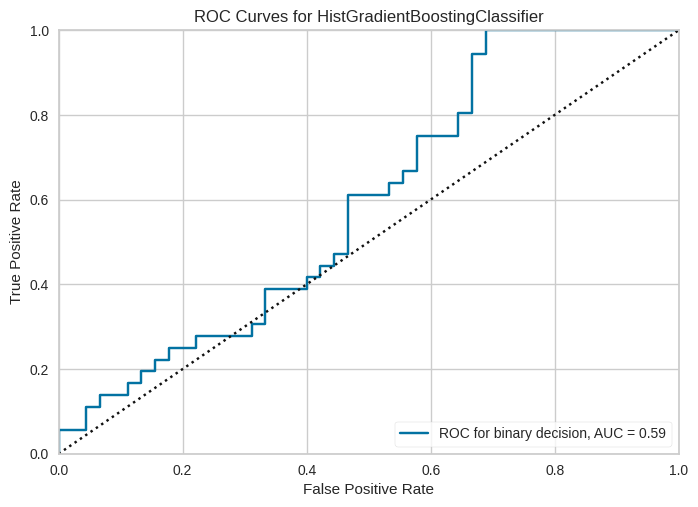

<Axes: title={'center': 'ROC Curves for HistGradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
from yellowbrick.classifier import ROCAUC
vis = ROCAUC(grid_search4.best_estimator_, binary=True)

vis.fit(X_train, y_train)        # Fit the training data to the visualizer
vis.score(X_test, y_test)        # Evaluate the model on the test data
vis.show()

In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/data/airline_passenger_satisfaction.csv")
df=df.drop(['Unnamed: 0'],axis=1)
df.isnull().sum()

,0
Gender,0
customer_type,0
age,0
type_of_travel,0
customer_class,0
flight_distance,0
inflight_wifi_service,0
departure_arrival_time_convenient,0
ease_of_online_booking,0
gate_location,0


In [ ]:
df

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [ ]:
X2 = df.drop('satisfaction', axis=1)
y2 = df['satisfaction']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size=0.3, stratify=y2,random_state=1)

In [ ]:
label_columns = X2.select_dtypes(include=['object']).columns
label_columns

Index(['Gender', 'customer_type', 'type_of_travel', 'customer_class'], dtype='object')

In [ ]:
air_hg=HistGradientBoostingClassifier(categorical_features=label_columns,random_state=1)
air_hg.fit(X_train2,y_train2)
air_hg.score(X_test2,y_test2)

0.9641463915409095

In [ ]:
from yellowbrick.classifier import ROCAUC
vis = ROCAUC(air_hg, binary=True)

vis.fit(X_train2, y_train2)        # Fit the training data to the visualizer
vis.score(X_test2, y_test2)        # Evaluate the model on the test data
vis.show()

ValueError: y_true takes value in {'neutral or dissatisfied', 'satisfied'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.